In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import geopandas as gpd

file_path = 'onb-v3-2-2-dpt95.gpkg'
gdf = gpd.read_file(file_path)

In [4]:
df=pd.read_json('ADEME.json')

df=pd.json_normalize(df['results'])




In [3]:


# FEATURES (sans partenariat)
selected_features_1=['Etiquette_DPE','Qualité_isolation_plancher_bas', 'Type_bâtiment', 'Période_construction', 'Hauteur_sous-plafond', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'Deperditions_baies_vitrées', 'Deperditions_enveloppe', 'Déperditions_murs', 'Deperditions_planchers_bas', 'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques', 'Déperditions_portes', 'Déperditions_renouvellement_air', 'Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs',]

#Fearues ademe+partenariatit/appel
selected_features_partenariat=['Etiquette_DPE', 'Type_bâtiment', 'Période_construction', 'Hauteur_sous-plafond', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'Conso_5_usages_é_finale', 'Conso_5_usages/m²_é_finale', 'Conso_chauffage_é_finale', 'Conso_chauffage_dépensier_é_finale', 'Conso_éclairage_é_finale', 'Conso_ECS_é_finale', 'Conso_ECS_dépensier_é_finale', 'Conso_refroidissement_é_finale', 'Conso_refroidissement_dépensier_é_finale', 'Conso_auxiliaires_é_finale', 'Conso_5_usages_é_primaire', 'Conso_5_usages_par_m²_é_primaire', 'Conso_chauffage_é_primaire', 'Conso_chauffage_dépensier_é_primaire', 'Conso_éclairage_é_primaire', 'Conso_ECS_é_primaire', 'Conso_ECS_dépensier_é_primaire', 'Conso_refroidissement_é_primaire', 'Conso_refroidissement_dépensier_é_primaire', 'Conso_auxiliaires_é_primaire', 'Emission_GES_5_usages', 'Emission_GES_5_usages_par_m²', 'Emission_GES_chauffage', 'Emission_GES_chauffage_dépensier', 'Emission_GES_éclairage', 'Emission_GES_ECS', 'Emission_GES_ECS_dépensier', 'Emission_GES_refroidissement', 'Emission_GES_refroidissement_dépensier', 'Emission_GES_auxiliaires', 'Conso_5_usages_é_finale_énergie_n°1', 'Conso_chauffage_é_finale_énergie_n°1', 'Conso_ECS_é_finale_énergie_n°1', 'Coût_total_5_usages_énergie_n°1', 'Coût_chauffage_énergie_n°1', 'Coût_ECS_énergie_n°1', 'Emission_GES_5_usages_énergie_n°1', 'Emission_GES_chauffage_énergie_n°1', 'Emission_GES_ECS_énergie_n°1', 'Type_énergie_n°1', 'Coût_total_5_usages', 'Coût_chauffage', 'Coût_chauffage_dépensier', 'Coût_éclairage', 'Coût_ECS', 'Coût_ECS_dépensier', 'Coût_refroidissement', 'Coût_refroidissement_dépensier', 'Coût_auxiliaires', 'Type_énergie_principale_chauffage', 'Conso_chauffage_installation_chauffage_n°1', 'Conso_chauffage_dépensier_installation_chauffage_n°1', 'Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS', 'Conso_é_finale_installation_ECS', 'Conso_é_finale_dépensier_installation_ECS', 'Type_installation_ECS', 'Surface_habitable_desservie_par_installation_ECS', 'Conso_é_finale_générateur_ECS_n°1', 'Conso_é_finale_dépensier_générateur_ECS_n°1', 'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1', 'Volume_stockage_générateur_ECS_n°1', 'Production_électricité_PV_(kWhep/an)',]

#Features Ademe+visite/drone+Partenariat
selected_features_comp=['Etiquette_DPE', 'Type_bâtiment', 'Période_construction', 'Hauteur_sous-plafond', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'Deperditions_baies_vitrées', 'Deperditions_enveloppe', 'Déperditions_murs', 'Deperditions_planchers_bas', 'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques', 'Déperditions_portes', 'Déperditions_renouvellement_air', 'Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs', 'Conso_5_usages_é_finale', 'Conso_5_usages/m²_é_finale', 'Conso_chauffage_é_finale', 'Conso_chauffage_dépensier_é_finale', 'Conso_éclairage_é_finale', 'Conso_ECS_é_finale', 'Conso_ECS_dépensier_é_finale', 'Conso_refroidissement_é_finale', 'Conso_refroidissement_dépensier_é_finale', 'Conso_auxiliaires_é_finale', 'Conso_5_usages_é_primaire', 'Conso_5_usages_par_m²_é_primaire', 'Conso_chauffage_é_primaire', 'Conso_chauffage_dépensier_é_primaire', 'Conso_éclairage_é_primaire', 'Conso_ECS_é_primaire', 'Conso_ECS_dépensier_é_primaire', 'Conso_refroidissement_é_primaire', 'Conso_refroidissement_dépensier_é_primaire', 'Conso_auxiliaires_é_primaire', 'Emission_GES_5_usages','Qualité_isolation_plancher_bas', 'Emission_GES_5_usages_par_m²', 'Emission_GES_chauffage', 'Emission_GES_chauffage_dépensier', 'Emission_GES_éclairage', 'Emission_GES_ECS', 'Emission_GES_ECS_dépensier', 'Emission_GES_refroidissement', 'Emission_GES_refroidissement_dépensier', 'Emission_GES_auxiliaires', 'Conso_5_usages_é_finale_énergie_n°1', 'Conso_chauffage_é_finale_énergie_n°1', 'Conso_ECS_é_finale_énergie_n°1', 'Coût_total_5_usages_énergie_n°1', 'Coût_chauffage_énergie_n°1', 'Coût_ECS_énergie_n°1', 'Emission_GES_5_usages_énergie_n°1', 'Emission_GES_chauffage_énergie_n°1', 'Emission_GES_ECS_énergie_n°1', 'Type_énergie_n°1', 'Coût_total_5_usages', 'Coût_chauffage', 'Coût_chauffage_dépensier', 'Coût_éclairage', 'Coût_ECS', 'Coût_ECS_dépensier', 'Coût_refroidissement', 'Coût_refroidissement_dépensier', 'Coût_auxiliaires', 'Type_énergie_principale_chauffage', 'Conso_chauffage_installation_chauffage_n°1', 'Conso_chauffage_dépensier_installation_chauffage_n°1', 'Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS', 'Conso_é_finale_installation_ECS', 'Conso_é_finale_dépensier_installation_ECS', 'Type_installation_ECS', 'Surface_habitable_desservie_par_installation_ECS', 'Conso_é_finale_générateur_ECS_n°1', 'Conso_é_finale_dépensier_générateur_ECS_n°1', 'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1', 'Volume_stockage_générateur_ECS_n°1', 'Production_électricité_PV_(kWhep/an)',]


In [2]:
#  Pas de partenariat pour les données d'emissions et de consommation et pas de données de terrain
var_cat=['Type_bâtiment', 'Période_construction','Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Type_énergie_n°1','Type_énergie_principale_chauffage','Type_énergie_générateur_n°1_installation_n°1','Type_générateur_n°1_installation_n°1','Type_énergie_principale_ECS','Type_installation_ECS','Type_énergie_générateur_ECS_n°1','Type_générateur_ECS_n°1']
selected_features_sans_partenat=['Etiquette_DPE', 'Type_bâtiment', 'Période_construction', 'Hauteur_sous-plafond', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'Deperditions_baies_vitrées', 'Deperditions_enveloppe', 'Déperditions_murs', 'Deperditions_planchers_bas', 'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques', 'Déperditions_portes', 'Déperditions_renouvellement_air',  'Type_énergie_n°1','Type_énergie_principale_chauffage', 'Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS','Type_installation_ECS', 'Surface_habitable_desservie_par_installation_ECS',  'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1',]

In [5]:
var_cat1=['Qualité_isolation_menuiseries','Période_construction','Qualité_isolation_plancher_bas','Qualité_isolation_enveloppe','Qualité_isolation_murs','Classe_altitude','Zone_climatique_','Classe_inertie_bâtiment','Type_bâtiment',]
var_cat2=[ 'Type_bâtiment', 'Période_construction', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_' ,'Type_énergie_n°1','Type_énergie_principale_chauffage','Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS', 'Type_installation_ECS', 'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1' ]
var_cat3=['Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_','Type_bâtiment', 'Période_construction','Qualité_isolation_plancher_bas','Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs','Type_énergie_n°1','Type_énergie_principale_chauffage','Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS','Type_installation_ECS', 'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1',]




In [35]:
#df_encoded = pd.get_dummies(df, columns=var_cat,drop_first=True)
def encoding(df,var_cat,selected_features):
    df_encoded=df[selected_features]
    df_encoded.dropna(inplace=True)

    added_dummies = set()

    for feature in var_cat:
        dummies = pd.get_dummies(df_encoded[feature], prefix=feature,drop_first=True)
        
        new_cols = [col for col in dummies.columns if col not in added_dummies]
        
        df_encoded = pd.concat([df_encoded.drop(feature, axis=1), dummies[new_cols]], axis=1)
        added_dummies.update(new_cols)
    

    mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
    df_encoded['Etiquette_DPE'] = df_encoded['Etiquette_DPE'].map(mapping)

    numerical_features= [col for col in selected_features if col not in var_cat and df[col].dtype != 'object']

    scaler = StandardScaler()

    df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
    return df_encoded


In [36]:
df_encoded=encoding(df,var_cat,selected_features_sans_partenat)
df_encoded=df_encoded.drop(['Deperditions_enveloppe', 'Deperditions_planchers_bas', 'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques', 'Déperditions_portes', 'Déperditions_renouvellement_air','Deperditions_baies_vitrées','Déperditions_murs'],axis=1)


C:\Users\bacca\AppData\Local\Temp/ipykernel_21308/1712318618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.dropna(inplace=True)


In [8]:
df_encoded_1=encoding(df,var_cat1,selected_features_1)
df_encoded_2=encoding(df,var_cat2,selected_features_partenariat)
df_encoded_3=encoding(df,var_cat3,selected_features_comp)

C:\Users\bacca\AppData\Local\Temp/ipykernel_17884/1712318618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.dropna(inplace=True)
C:\Users\bacca\AppData\Local\Temp/ipykernel_17884/1712318618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.dropna(inplace=True)
C:\Users\bacca\AppData\Local\Temp/ipykernel_17884/1712318618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.dropna(inplace=True)


### Train test split for the training

In [9]:
X1,y1=df_encoded_1.drop('Etiquette_DPE',axis=1),df_encoded_1['Etiquette_DPE']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2,y2=df_encoded_2.drop('Etiquette_DPE',axis=1),df_encoded_2['Etiquette_DPE']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

X3,y3=df_encoded_3.drop('Etiquette_DPE',axis=1),df_encoded_3['Etiquette_DPE']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)


## 1. Xgboost

In [37]:
X,y=df_encoded.drop('Etiquette_DPE',axis=1),df_encoded['Etiquette_DPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
y_pred = xgb_classifier.predict(X_test)
accuracy_score(y_test,y_pred)


0.5508130081300813

In [10]:

xgb_classifier1 = XGBClassifier() # features réduits
xgb_classifier1.fit(X_train1, y_train1)

xgb_classifier2 = XGBClassifier() #ADEME+partenariat
xgb_classifier2.fit(X_train2, y_train2)

xgb_classifier3 = XGBClassifier() #Features comp
xgb_classifier3.fit(X_train3, y_train3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
y_pred1 = xgb_classifier1.predict(X_test1)
y_pred2 = xgb_classifier2.predict(X_test2)
y_pred3 = xgb_classifier3.predict(X_test3)

In [101]:
accuracy_score(y_test1,y_pred1)


0.5890760592138846

In [102]:
accuracy_score(y_test2,y_pred2)

0.9949290060851927

In [103]:
accuracy_score(y_test3,y_pred3)

0.9892583120204603

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)
cm3 = confusion_matrix(y_test3, y_pred3)
cm=confusion_matrix(y_test,y_pred)


'cm=confusion_matrix(y_test,y_pred)\n'

In [42]:
cm=confusion_matrix(y_test,y_pred)

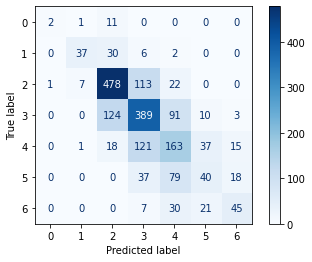

In [107]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

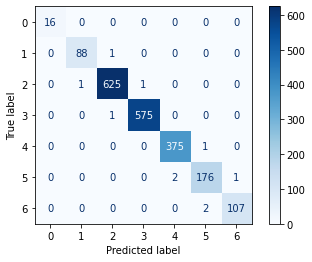

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

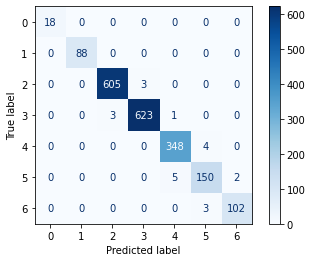

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

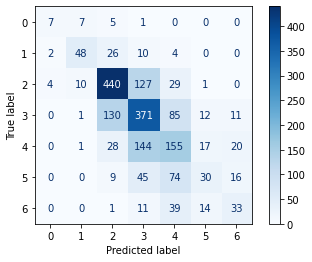

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

#### Feature importance for the Xgboost model  (Visite+ deone mais sans partenariat )

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

[14:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


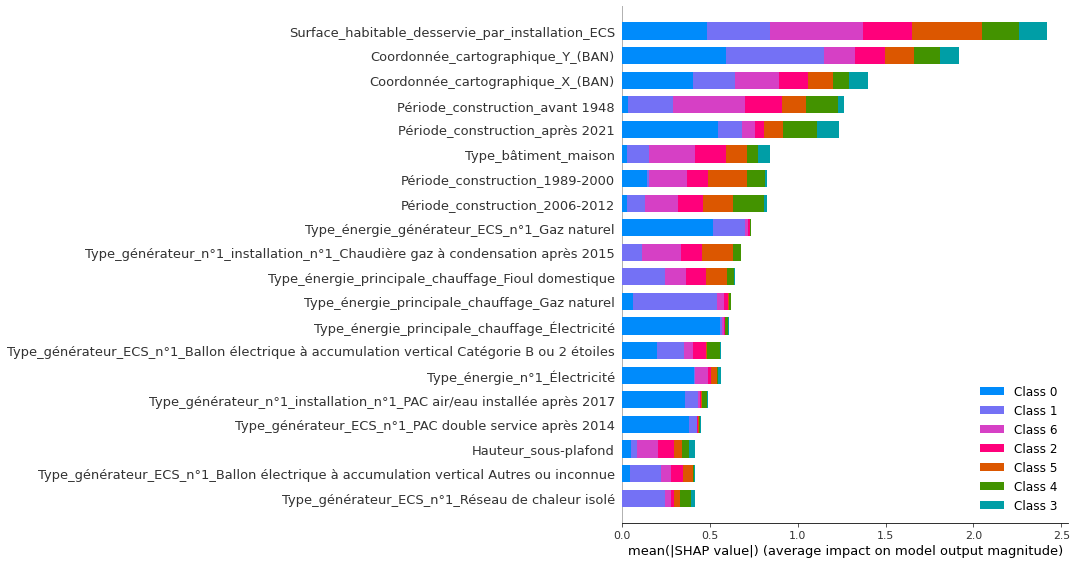

In [44]:
import shap

explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


[10:30:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


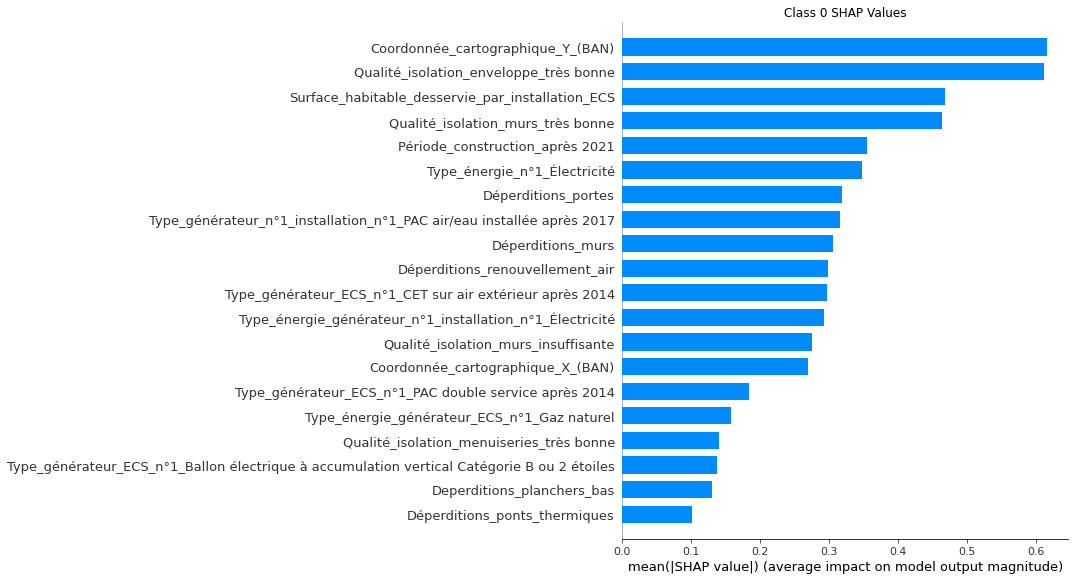

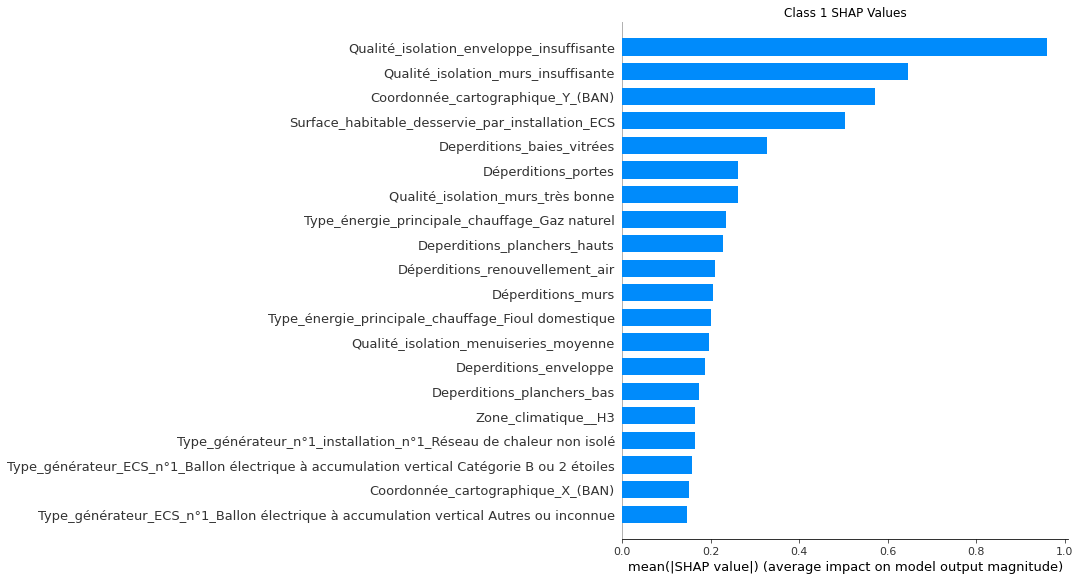

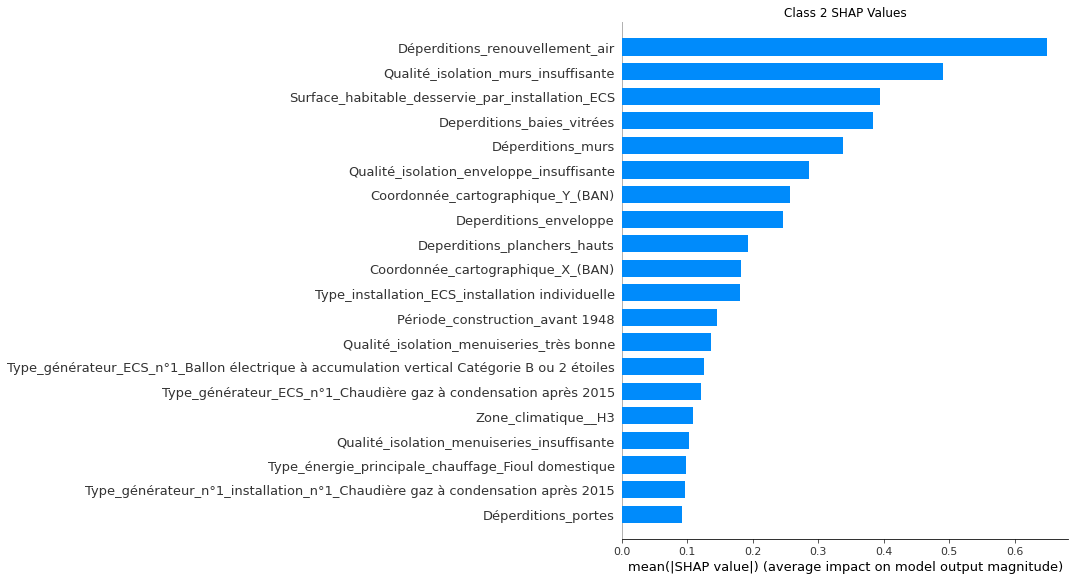

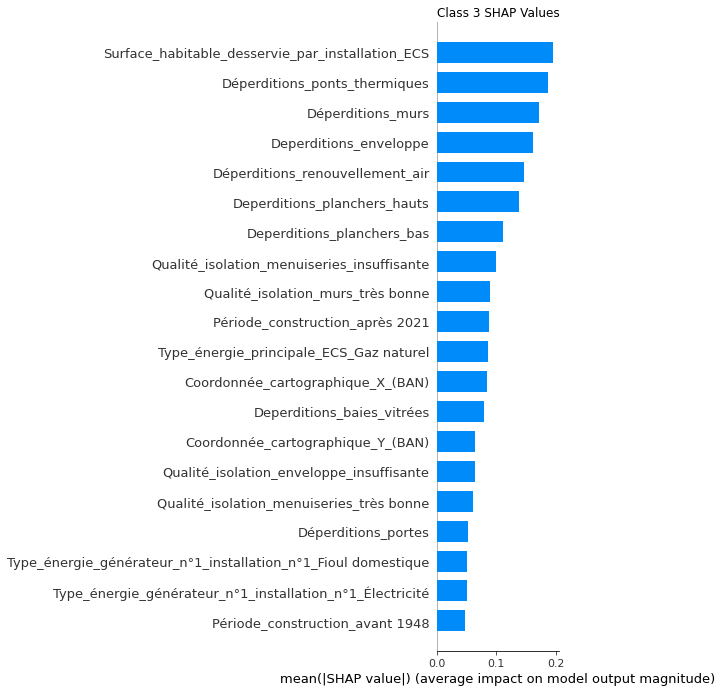

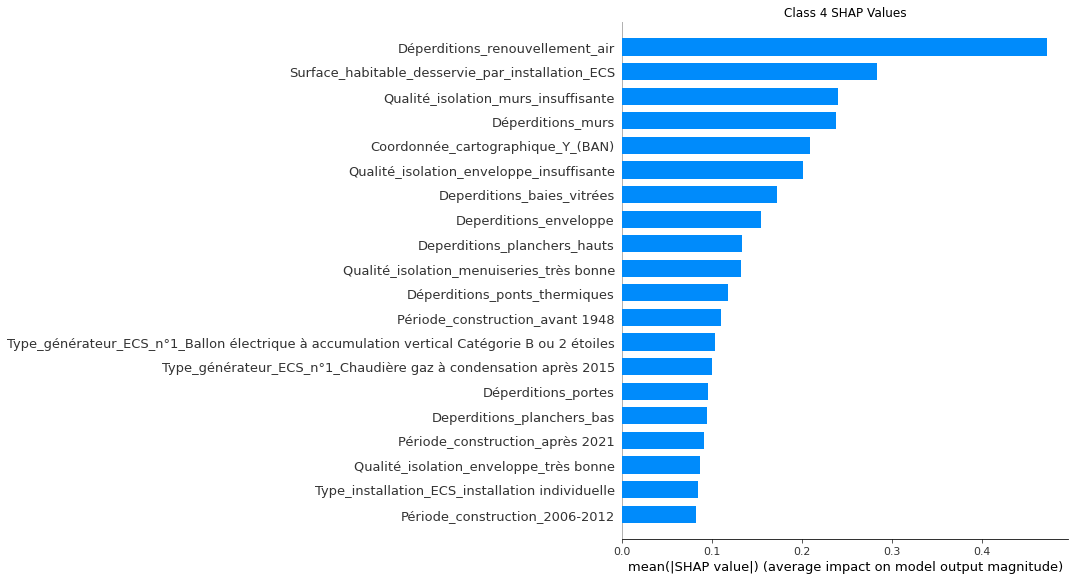

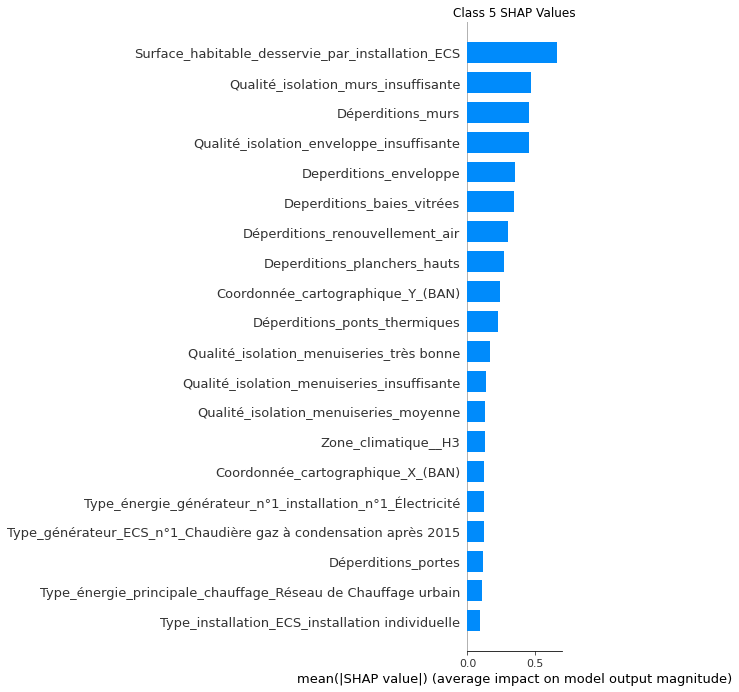

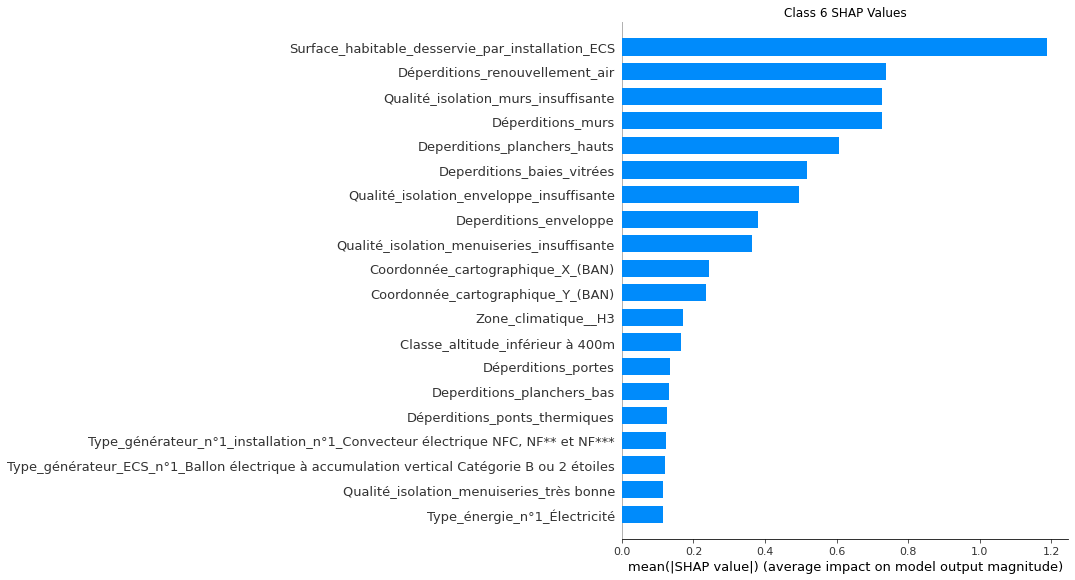

In [49]:
import shap

explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)  # This will return a list of SHAP values arrays for multi-class models

# Iterate over each class's SHAP values and create a summary plot
for i in range(len(shap_values)):
    shap.summary_plot(shap_values[i], X_test, plot_type="bar", show=False)
    plt.title(f"Class {i} SHAP Values")
    plt.show()


# 2. Réseau de neurones

In [50]:
def nn_preprocessing(X_train,y_train,X_test,y_test):
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
    return (train_loader,test_loader,y_train_tensor,y_test_tensor)


train_loader,test_loader,y_train_tensor,y_test_tensor=nn_preprocessing(X_train,y_train,X_test,y_test)
'''train_loader2,test_loader2,y_train_tensor2,y_test_tensor2=nn_preprocessing(X_train2,y_train2,X_test2,y_test2)
train_loader3,test_loader3,y_train_tensor3,y_test_tensor3=nn_preprocessing(X_train3,y_train3,X_test3,y_test3)
'''
class Net(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size) 
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)  
        self.fc3 = nn.Linear(hidden2_size, num_classes)  

    def forward(self, x, return_raw_scores=False):
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))  
        scores = self.fc3(x)  

        if return_raw_scores:
            return scores

        return F.log_softmax(scores, dim=1)



In [51]:
input_size = X_train.shape[1]  
hidden1_size = 128  
hidden2_size = 64  

num_classes = len(y_train.unique())
net = Net(input_size=input_size, hidden1_size=hidden1_size, hidden2_size=hidden2_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

for epoch in range(100):  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test dataset: {100 * correct / total}%')

Epoch 1, Loss: 1.0053880214691162
Epoch 2, Loss: 1.0266880989074707
Epoch 3, Loss: 0.8535330295562744
Epoch 4, Loss: 0.8631100654602051
Epoch 5, Loss: 1.027953863143921
Epoch 6, Loss: 0.8136816620826721
Epoch 7, Loss: 0.9162824153900146
Epoch 8, Loss: 0.7900805473327637
Epoch 9, Loss: 0.773335874080658
Epoch 10, Loss: 0.9150592088699341
Epoch 11, Loss: 0.8293159008026123
Epoch 12, Loss: 0.8477292060852051
Epoch 13, Loss: 0.7701352834701538
Epoch 14, Loss: 0.7605765461921692
Epoch 15, Loss: 0.7216914296150208
Epoch 16, Loss: 0.8022846579551697
Epoch 17, Loss: 0.6952353715896606
Epoch 18, Loss: 0.7450838685035706
Epoch 19, Loss: 0.6279714107513428
Epoch 20, Loss: 0.7005367875099182
Epoch 21, Loss: 0.6662258505821228
Epoch 22, Loss: 0.5423402190208435
Epoch 23, Loss: 0.5460704565048218
Epoch 24, Loss: 0.5193297863006592
Epoch 25, Loss: 0.49234941601753235
Epoch 26, Loss: 0.5467656254768372
Epoch 27, Loss: 0.4318286180496216
Epoch 28, Loss: 0.5057509541511536
Epoch 29, Loss: 0.556003570556

In [ ]:
feature_gradients = {i: torch.zeros(input_size) for i in range(num_classes)}
batch_counts = {i: 0 for i in range(num_classes)}
reverse_mapping = {v: k for k, v in mapping.items()}

net.eval()

for inputs, labels in test_loader:
    inputs.requires_grad = True
    
    outputs = net(inputs, return_raw_scores=True)
    
    for i in range(num_classes):
        net.zero_grad()  
        class_scores = outputs[:, i]
        class_scores.mean().backward(retain_graph=True)  
        
        feature_gradients[i] += inputs.grad.data.abs().sum(dim=0)
        batch_counts[i] += 1

for i in range(num_classes):
    feature_gradients[i] /= batch_counts[i]

for i in range(num_classes):
    feature_importance = feature_gradients[i].numpy()  
    
    feature_importance_df = pd.DataFrame({
        'Feature': list(X_train.columns),
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False).head(30)  # Select top 20 features

    original_label = reverse_mapping[i]
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'Top 20 Features by Importance for Class {original_label}')
    plt.gca().invert_yaxis()  # Highest importance at top
    plt.show()


## Analyze the activations during training for each target class

In [ ]:
### Activations during training


feature_importance_per_class = {class_id: torch.zeros(60) for class_id in range(num_classes)}
count_per_class = {class_id: 0 for class_id in range(7)}

for epoch in range(100):  
    for inputs, labels in train_loader:
        inputs.requires_grad = True
        
        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        net.zero_grad()
        loss.backward()
        
        # For each class, update feature importance based on gradients
        _, preds = torch.max(outputs, 1)
        for class_id in range(num_classes):
            class_mask = labels == class_id
            if class_mask.any():
                # Accumulate gradients for the specific class
                class_specific_grads = inputs.grad[class_mask].abs().sum(dim=0)
                feature_importance_per_class[class_id] += class_specific_grads
                count_per_class[class_id] += class_mask.sum().item()
        
        # Update model parameters
        optimizer.step()

for class_id in feature_importance_per_class:
    feature_importance_per_class[class_id] /= count_per_class[class_id]


feature_importance_dfs = {}
for class_id, importance in feature_importance_per_class.items():
    df = pd.DataFrame({
        'Feature': list(X_train.columns),
        'Importance': importance.numpy()
    }).sort_values(by='Importance', ascending=False)
    feature_importance_dfs[class_id] = df



feature_importance_dfs

# Prediction des coefs de déperditions

In [10]:
selected_features_sans_partenat

['Etiquette_DPE',
 'Type_bâtiment',
 'Période_construction',
 'Hauteur_sous-plafond',
 'Classe_inertie_bâtiment',
 'Classe_altitude',
 'Zone_climatique_',
 'Coordonnée_cartographique_X_(BAN)',
 'Coordonnée_cartographique_Y_(BAN)',
 'Deperditions_baies_vitrées',
 'Deperditions_enveloppe',
 'Déperditions_murs',
 'Deperditions_planchers_bas',
 'Deperditions_planchers_hauts',
 'Déperditions_ponts_thermiques',
 'Déperditions_portes',
 'Déperditions_renouvellement_air',
 'Type_énergie_n°1',
 'Type_énergie_principale_chauffage',
 'Type_énergie_générateur_n°1_installation_n°1',
 'Type_générateur_n°1_installation_n°1',
 'Type_énergie_principale_ECS',
 'Type_installation_ECS',
 'Surface_habitable_desservie_par_installation_ECS',
 'Type_énergie_générateur_ECS_n°1',
 'Type_générateur_ECS_n°1']

In [20]:
df_deperdition=df[selected_features_sans_partenat]
df_deperdition.dropna(inplace=True)

#df_deperdition = df_deperdition[df_deperdition['Etiquette_DPE'].isin(['D', 'E', 'F', 'G'])]


# Function to remove outliers for a column based on quantiles
def remove_outliers(df, column):
    q_low = df[column].quantile(0.05)
    q_hi = df[column].quantile(0.95)
    return df[(df[column] >= q_low) & (df[column] <= q_hi)]

deperdition_features = [
    'Déperditions_murs', 'Deperditions_planchers_bas', 'Deperditions_planchers_hauts',
    'Deperditions_enveloppe', 'Déperditions_ponts_thermiques', 'Déperditions_portes',
    'Deperditions_baies_vitrées', 'Déperditions_renouvellement_air'
]

for feature in deperdition_features:
    df_deperdition = remove_outliers(df_deperdition, feature)



deperdition_murs,deperdition_planchers_bas,deperdition_planchers_haut,deperdition_enveloppe,deperdition_pont_therm,deperdition_portes,deperdition_baies,deperdition_renouvellement_air=df_deperdition['Déperditions_murs'],df_deperdition['Deperditions_planchers_bas'], df_deperdition['Deperditions_planchers_hauts'],df_deperdition['Deperditions_enveloppe'], df_deperdition['Déperditions_ponts_thermiques'], df_deperdition['Déperditions_portes'],df_deperdition['Deperditions_baies_vitrées'],df_deperdition['Déperditions_renouvellement_air']
deperdition_vars=df_deperdition[deperdition_features]
df_deperdition=df_deperdition.drop(deperdition_features,axis=1)


C:\Users\bacca\AppData\Local\Temp/ipykernel_21308/2771266902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deperdition.dropna(inplace=True)


In [21]:
numerical_features= [col for col in df_deperdition.columns if col not in var_cat and df[col].dtype != 'object']
scaler = StandardScaler()
df_deperdition[numerical_features] = scaler.fit_transform(df_deperdition[numerical_features])

In [22]:

added_dummies = set()
for feature in var_cat+['Etiquette_DPE']:
        dummies = pd.get_dummies(df_deperdition[feature], prefix=feature,drop_first=True)
        
        new_cols = [col for col in dummies.columns if col not in added_dummies]
        
        df_deperdition = pd.concat([df_deperdition.drop(feature, axis=1), dummies[new_cols]], axis=1)
        added_dummies.update(new_cols)

In [23]:
deperdition_vars

,Déperditions_murs,Deperditions_planchers_bas,Deperditions_planchers_hauts,Deperditions_enveloppe,Déperditions_ponts_thermiques,Déperditions_portes,Deperditions_baies_vitrées,Déperditions_renouvellement_air
0,191.0,0.0,98.5,597.3,26.7,15.0,91.3,174.8
1,98.4,0.0,0.0,187.2,10.0,1.2,29.6,48.0
2,22.1,13.0,7.1,133.7,22.8,2.9,24.7,41.0
4,116.1,0.0,15.0,284.1,54.1,5.9,39.6,53.5
5,74.1,22.8,13.1,288.2,9.2,6.3,57.5,105.2
...,...,...,...,...,...,...,...,...
9989,339.8,109.4,50.6,1326.5,225.6,29.9,133.6,437.6
9993,362.4,44.9,91.1,824.4,36.4,8.6,51.4,229.6
9995,71.3,0.0,0.0,191.3,27.6,5.6,23.0,63.7
9996,240.8,23.8,4.8,480.7,50.5,5.7,57.4,97.7


## I- Prédiction avec XGboost

### 1. Déperdition baies vitrées

In [85]:
import xgboost as xgb
xgb_baies = xgb.XGBRegressor()
X_train_baies, X_test_baies, y_train_baies, y_test_baies = train_test_split(df_deperdition, deperdition_baies, test_size=0.2, random_state=42)
xgb_baies.fit(X_train_baies, y_train_baies)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
df_deperdition.shape

(5667, 277)

In [87]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred_baies=xgb_baies.predict(X_test_baies)
np.sqrt(mean_squared_error(y_test_baies, y_pred_baies))


130.60599504998603

### 2. Déperdition murs

In [28]:
xgb_murs = xgb.XGBRegressor()
X_train_murs, X_test_murs, y_train_murs, y_test_murs = train_test_split(df_deperdition, deperdition_murs, test_size=0.2, random_state=42)
xgb_murs.fit(X_train_murs, y_train_murs)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:

y_pred_murs=xgb_murs.predict(X_test_murs)
np.sqrt(mean_squared_error(y_test_murs, y_pred_murs))


332.4003391523169

In [37]:
y_test_murs.describe()

count     1259.000000
mean       621.872518
std       1745.681844
min          1.200000
25%         48.750000
50%        114.100000
75%        291.550000
max      19923.300000
Name: Déperditions_murs, dtype: float64

### 3. Prédire les coefs de deperditions tous a la fois

In [57]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(df_deperdition, deperdition_vars, test_size=0.2, random_state=42)

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

multioutput_regressor = MultiOutputRegressor(xgb_regressor)

multioutput_regressor.fit(X_train, y_train)

predictions = multioutput_regressor.predict(X_test)

In [60]:
y_test.describe()

,Déperditions_murs,Deperditions_planchers_bas,Deperditions_planchers_hauts,Deperditions_enveloppe,Déperditions_ponts_thermiques,Déperditions_portes,Deperditions_baies_vitrées,Déperditions_renouvellement_air
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,133.996593,35.924649,32.008317,450.148798,48.394589,8.906814,60.724850,130.398497
std,163.200552,32.913315,42.261212,400.365049,63.704025,7.265604,68.205313,123.404070
min,10.300000,0.000000,0.000000,98.800000,1.800000,0.000000,13.000000,36.800000
25%,45.025000,17.725000,7.700000,217.075000,16.025000,3.300000,25.900000,64.300000
50%,86.300000,29.800000,16.350000,317.800000,29.200000,7.300000,38.100000,89.250000
75%,167.475000,45.875000,38.625000,513.350000,48.975000,12.500000,61.175000,135.825000
max,1987.700000,262.500000,266.100000,3420.900000,478.400000,37.500000,507.100000,681.000000


In [58]:
from sklearn.metrics import mean_absolute_error
import numpy as np
# Calculate MAPE for each feature
mae_scores = {feature: mean_absolute_error(y_test[feature], predictions[:, i])
               for i, feature in enumerate(deperdition_features)}

# Create a DataFrame for the absolute differences between predictions and actual values
absolute_differences = pd.DataFrame(predictions - y_test.values, columns=deperdition_features, index=y_test.index)

print(mae_scores)
absolute_differences.head()

{'Déperditions_murs': 51.33873099153171, 'Deperditions_planchers_bas': 16.697390051932636, 'Deperditions_planchers_hauts': 22.347345497684632, 'Deperditions_enveloppe': 106.58643230675217, 'Déperditions_ponts_thermiques': 22.66103047117561, 'Déperditions_portes': 4.779553173607465, 'Deperditions_baies_vitrées': 22.13458190007296, 'Déperditions_renouvellement_air': 30.575189723471603}


,Déperditions_murs,Deperditions_planchers_bas,Deperditions_planchers_hauts,Deperditions_enveloppe,Déperditions_ponts_thermiques,Déperditions_portes,Deperditions_baies_vitrées,Déperditions_renouvellement_air
3553,39.087218,-12.644164,-0.407285,78.289993,-1.029680,5.579804,12.585876,35.918550
2967,-24.118570,-3.448035,-10.123649,-56.875894,9.423751,-5.912377,18.577988,-30.186452
3221,-4.947363,-4.195914,5.264610,29.858948,18.745354,-8.834077,-0.905819,7.436295
2113,88.784381,26.070108,-20.792609,465.569263,213.028510,10.786672,52.766525,197.127002
8370,-32.222363,-13.792878,37.073303,-14.837442,-14.095769,-0.622358,38.829939,14.432863


In [68]:
absolute_differences=absolute_differences.reset_index()

In [72]:
absolute_differences.drop('index',inplace=True,axis=1)

Text(0.5, 1.0, "Ecart entre la valeur prédite et la valeur réelle de la déperdition de l'enveloppe")

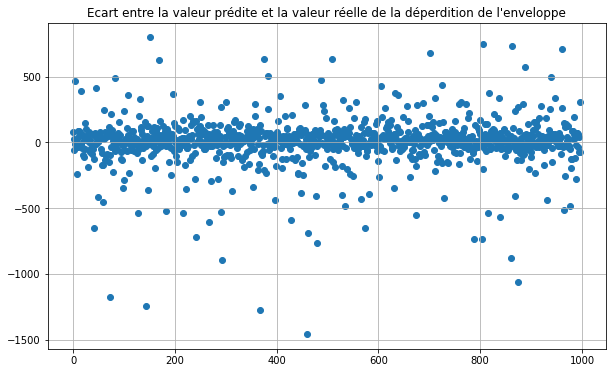

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(absolute_differences.index,absolute_differences.Deperditions_enveloppe)
plt.grid(True)
plt.title("Ecart entre la valeur prédite et la valeur réelle de la déperdition de l'enveloppe")



## II- Prediction avec Reseau de neurone

In [31]:
# Assuming X_train_baies, X_test_baies, y_train_baies, y_test_baies are already defined and are numpy arrays
X_train_tensor = torch.tensor(X_train_baies.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_baies.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_baies.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_baies.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)          # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 1)            # Second hidden layer to output layer
        self.relu = nn.ReLU()                  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [35]:
from tqdm import tqdm


input_size = X_train_baies.shape[1]
model = Net(input_size)
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 50  # You might want to adjust this

for epoch in tqdm(range(num_epochs), desc="Training Progress"):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()



Training Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 50/50 [00:30<00:00,  1.66it/s]


In [36]:
model.eval()  # Set the model to evaluation mode
total_loss = 0
with torch.no_grad():  # No need to track gradients
    for inputs, targets in tqdm(test_loader):
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        total_loss += loss.item() * inputs.size(0)  # Multiply by batch size to accumulate the actual loss

# Calculate the mean loss
mean_loss = total_loss / len(test_loader.dataset)

# Calculate RMSE
rmse = np.sqrt(mean_loss)
print(f'RMSE: {rmse}')


100%|██████████| 20/20 [00:00<00:00, 299.89it/s]

RMSE: 458.8952469212794
